# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 [==============================] - 0s 0us/step


## Problem-1

How many samples does the dataset have?

In [ ]:
print(X.shape[0])

100


## Problem-2

How many features does the dataset have?

In [ ]:
print(X.shape[1])

784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

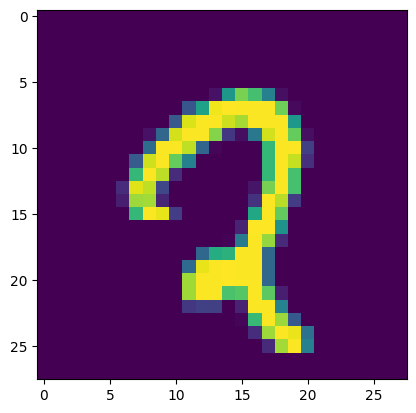

In [ ]:
reshaped_data = X[87].reshape(28,28)
import matplotlib.pyplot as plt
imgplot = plt.imshow(reshaped_data)

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
m=X.mean(axis=0)
X1=X-m
(n,d)=X.shape
s = np.sum(X1*X1)
import math
print(math.sqrt(s)/(n*d))

0.23242174456564685


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
C = np.cov(X1,rowvar=False)
s = np.sum(C*C)
d=C.shape[0]
import math
print(math.sqrt(s)/(d*d))

1.3785920211345706


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
w1=sorted_eigenvectors[:,0]
w2=sorted_eigenvectors[:,1]
print(np.sum(w1+w2))

1.0516243880598357


## Problem-7

Visualize the first principal component as an image.

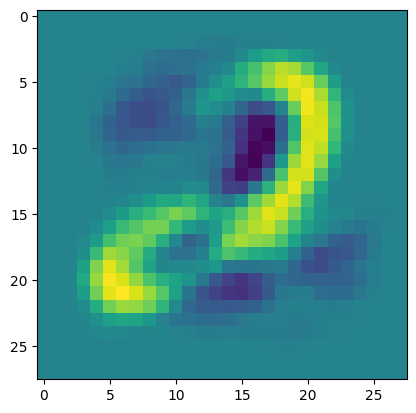

In [ ]:
first_component = w1.reshape(28,28)
first_eigen_value = sorted_eigenvalues[0]
second_component = w2.reshape(28,28)
second_eigen_value = sorted_eigenvalues[1]
# print(first_eigen_value * first_component)
import matplotlib.pyplot as plt
plt.imshow(first_component)

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
a=sorted_eigenvalues
dm = np.sum(a)
nm = np.sum(a[:53])
# print(np.sum(a))
# s=sorted_eigenvalues.size
print(nm/dm)

0.9508093424100518


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



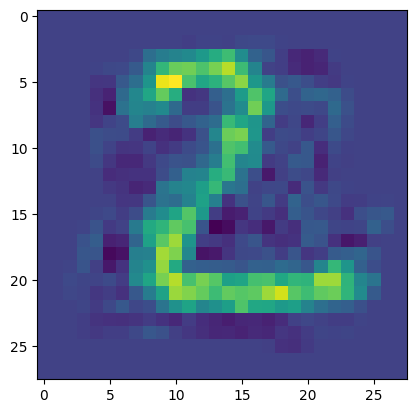

In [ ]:
k=53
import matplotlib.pyplot as plt

w=sorted_eigenvectors[:,:k]
plt.imshow((w @ (test_image @ w)).reshape(28,28))

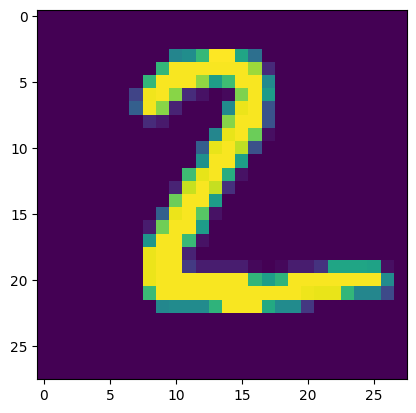

In [ ]:
plt.imshow(test_image.reshape(28,28))